<ul>
    <li> <h2><b>Universidade de Brasília - UnB</b></h2> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


    Primeira (1/5) Atividade Prática Avaliativa
    Entrega da Atividade 01/10/2019 
    "A não entrega na data esperada reduz em 50% na nota da avaliação"


<div id="Tópicos">
    <h2>Questões</h2>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol> 
        <li><a href="#Tópico 0">Questão 1</a></li>
        <li><a href="#Tópico 1">Questão 2</a></li>
        <li><a href="#Tópico 2">Questão 3</a></li>
        <li><a href="#Tópico 3">Questão 4</a></li>

</ol>
</div>


<div id="Tópico 0">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 1: Considerando os índices do grupo Setorial ou por Segmento, escolha 5 (cinco) índices e colete os preços diários (OHLC), assim como os volumes, dos 3 (três) papéis mais negociados (líquidos) em cada um dos 5 índices durante um período de 24 meses.
</h></a></h>   
</div> </div> </div> 
http://www.bmfbovespa.com.br/pt_br/produtos/indices/

In [16]:
%matplotlib notebook 
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()       
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

In [1]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2019.09.26 IMOB.xls')[0]['Código']
data.to_frame()
data = data.drop([14,15])
data.values
symbols=list(data.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

# Coleta dos volumes 

stocks_volume = stocks_all['Volume']

volumes = ['none'] * len(Stocks)

for i in range(len(Stocks)):
    volumes[i] = stocks_volume[Stocks[i]].sum()
n_volumes = np.array(volumes)
 
# Ordenar volumes em ordem decrescente

i_volumes = np.asarray(volumes, dtype = int)
sortd_volumes = np.array(-np.sort(-i_volumes))

# Nomear os 3 primeiros volumes

for i in range(len(Stocks)):
    if sortd_volumes[0] == n_volumes[i]:
            melhor = Stocks[i]
            p = melhor
    
    if sortd_volumes[1] == n_volumes[i]:
            melhor = Stocks[i]
            s = melhor

    if sortd_volumes[2] == n_volumes[i]:
            melhor = Stocks[i]
            t = melhor            

print("\n")            
print('primeira:', p, '= ', sortd_volumes[0])
print('segunda: ', s, '= ', sortd_volumes[1])
print('terceira:', t, '= ', sortd_volumes[2]) 
           
melhores_volumes = []
melhores_volumes.append(p)
melhores_volumes.append(s)
melhores_volumes.append(t)

# Cria array para os 3 melhores volumes do Indice 

imob = []
imob = melhores_volumes

[*********************100%***********************]  14 of 14 downloaded
primeira: BRML3.SA =  3253965000
segunda:  MRVE3.SA =  2031525026
terceira: TCSA3.SA =  1955109800


In [2]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2019.09.26 ICON.xls')[0]['Código']
data.to_frame()
data = data.drop([14,15])
data.values
symbols=list(data.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

# Coleta dos volumes 

stocks_volume = stocks_all['Volume']

volumes = ['none'] * len(Stocks)

for i in range(len(Stocks)):
    volumes[i] = stocks_volume[Stocks[i]].sum()
n_volumes = np.array(volumes)
 
# Ordenar volumes em ordem decrescente

i_volumes = np.asarray(volumes, dtype = int)
sortd_volumes = np.array(-np.sort(-i_volumes))

# Nomear os 3 primeiros volumes

for i in range(len(Stocks)):
    if sortd_volumes[0] == n_volumes[i]:
            melhor = Stocks[i]
            p = melhor
    
    if sortd_volumes[1] == n_volumes[i]:
            melhor = Stocks[i]
            s = melhor

    if sortd_volumes[2] == n_volumes[i]:
            melhor = Stocks[i]
            t = melhor            

print("\n")            
print('primeira:', p, '= ', sortd_volumes[0])
print('segunda: ', s, '= ', sortd_volumes[1])
print('terceira:', t, '= ', sortd_volumes[2]) 
           
melhores_volumes = []
melhores_volumes.append(p)
melhores_volumes.append(s)
melhores_volumes.append(t)

# Cria array para os 3 melhores volumes do Indice 

icon = []
icon = melhores_volumes

[*********************100%***********************]  52 of 52 downloaded
primeira: ABEV3.SA =  8964508900
segunda:  MGLU3.SA =  5977355800
terceira: KROT3.SA =  5490388800


In [3]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2019.09.26 IFNC.xls')[0]['Código']
data.to_frame()
data = data.drop([14,15])
data.values
symbols=list(data.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

# Coleta dos volumes 

stocks_volume = stocks_all['Volume']

volumes = ['none'] * len(Stocks)

for i in range(len(Stocks)):
    volumes[i] = stocks_volume[Stocks[i]].sum()
n_volumes = np.array(volumes)
 
# Ordenar volumes em ordem decrescente

i_volumes = np.asarray(volumes, dtype = int)
sortd_volumes = np.array(-np.sort(-i_volumes))

# Nomear os 3 primeiros volumes

for i in range(len(Stocks)):
    if sortd_volumes[0] == n_volumes[i]:
            melhor = Stocks[i]
            p = melhor
    
    if sortd_volumes[1] == n_volumes[i]:
            melhor = Stocks[i]
            s = melhor

    if sortd_volumes[2] == n_volumes[i]:
            melhor = Stocks[i]
            t = melhor            

print("\n")
print('primeira:', p, '= ', sortd_volumes[0])
print('segunda: ', s, '= ', sortd_volumes[1])
print('terceira:', t, '= ', sortd_volumes[2]) 
           
melhores_volumes = []
melhores_volumes.append(p)
melhores_volumes.append(s)
melhores_volumes.append(t)

# Cria array para os 3 melhores volumes do Indice 

ifnc = []
ifnc = melhores_volumes

[*********************100%***********************]  13 of 13 downloaded
primeira: ITSA4.SA =  10545461070
segunda:  BBDC4.SA =  8162880968
terceira: CIEL3.SA =  5590072600


In [4]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2019.09.26 IVBX 2.xls')[0]['Código']
data.to_frame()
data = data.drop([14,15])
data.values
symbols=list(data.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

# Coleta dos volumes 

stocks_volume = stocks_all['Volume']

volumes = ['none'] * len(Stocks)

for i in range(len(Stocks)):
    volumes[i] = stocks_volume[Stocks[i]].sum()
n_volumes = np.array(volumes)
 
# Ordenar volumes em ordem decrescente

i_volumes = np.asarray(volumes, dtype = int)
sortd_volumes = np.array(-np.sort(-i_volumes))

# Nomear os 3 primeiros volumes

for i in range(len(Stocks)):
    if sortd_volumes[0] == n_volumes[i]:
            melhor = Stocks[i]
            p = melhor
    
    if sortd_volumes[1] == n_volumes[i]:
            melhor = Stocks[i]
            s = melhor

    if sortd_volumes[3] == n_volumes[i]:
            melhor = Stocks[i]
            t = melhor            

print("\n")
print('primeira:', p, '= ', sortd_volumes[0])
print('segunda: ', s, '= ', sortd_volumes[1])
print('terceira:', t, '= ', sortd_volumes[3]) 
           
melhores_volumes = []
melhores_volumes.append(p)
melhores_volumes.append(s)
melhores_volumes.append(t)

# Cria array para os 3 melhores volumes do Indice 

ivbx = []
ivbx = melhores_volumes

[*********************100%***********************]  46 of 46 downloaded
primeira: USIM5.SA =  7338295400
segunda:  GOAU4.SA =  6143623066
terceira: GGBR4.SA =  5791606000


In [17]:
# Leitura do arquivo .xls do indice

data = pd.read_html('2019.09.26 MLCX.xls')[0]['Código']
data.to_frame()
data = data.drop([14,15])
data.values
symbols=list(data.values)

Stocks=[]
for symbol in symbols:
    if len(symbol)==5:
        Stocks.append(symbol)


Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

# Definicao do periodo de analise

today      = dt.date.today()
E_Day      = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day      = day_before.day; S_Month = day_before.month; S_Year = day_before.year

stocks_all = yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

# Coleta dos volumes 

stocks_volume = stocks_all['Volume']

volumes = ['none'] * len(Stocks)

for i in range(len(Stocks)):
    volumes[i] = stocks_volume[Stocks[i]].sum()
n_volumes = np.array(volumes)
 
# Ordenar volumes em ordem decrescente

i_volumes = np.asarray(volumes, dtype = int)
sortd_volumes = np.array(-np.sort(-i_volumes))

# Nomear os 3 primeiros volumes

for i in range(len(Stocks)):
    if sortd_volumes[0] == n_volumes[i]:
            melhor = Stocks[i]
            p = melhor
    
    if sortd_volumes[2] == n_volumes[i]:
            melhor = Stocks[i]
            s = melhor

    if sortd_volumes[3] == n_volumes[i]:
            melhor = Stocks[i]
            t = melhor            

print("\n")
print('primeira:', p, '= ', sortd_volumes[0])
print('segunda: ', s, '= ', sortd_volumes[2])
print('terceira:', t, '= ', sortd_volumes[3]) 
           
melhores_volumes = []
melhores_volumes.append(p)
melhores_volumes.append(s)
melhores_volumes.append(t)

print("\n")

# Cria array para os 3 melhores volumes do Indice 

mlcx = []
mlcx = melhores_volumes

maiores_volumes = []
maiores_volumes = imob + icon + ifnc + ivbx + mlcx
print('--------------------------------------------------------------------------------------------------')
print('------------------------------3 ATIVOS COM MAIOR VOLUME EM CADA INDICE:---------------------------')
print('--------------------------------------------------------------------------------------------------')
print("\n")
print(maiores_volumes)

[*********************100%***********************]  58 of 58 downloaded
primeira: PETR4.SA =  28726883000
segunda:  ITUB4.SA =  9752950250
terceira: VALE3.SA =  9532106500


--------------------------------------------------------------------------------------------------
------------------------------3 ATIVOS COM MAIOR VOLUME EM CADA INDICE:---------------------------
--------------------------------------------------------------------------------------------------
['BRML3.SA', 'MRVE3.SA', 'TCSA3.SA', 'ABEV3.SA', 'MGLU3.SA', 'KROT3.SA', 'ITSA4.SA', 'BBDC4.SA', 'CIEL3.SA', 'USIM5.SA', 'GOAU4.SA', 'GGBR4.SA', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA']


In [6]:
print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print('                                PRECOS(2 ANOS)                                              ')

for i in range(len(maiores_volumes)):
    msft = yf.Ticker(maiores_volumes[i])
    print('--------------------------------------------------------------------------------------------')
    print(maiores_volumes[i])
    print('--------------------------------------------------------------------------------------------')
    print(msft.history(period="2y"))

    
#-----------------------------------PRECOS DOS INDICES(OHLC)-------------------------------------------------    
#msft = yf.Ticker('IMOB.SA')
#print('--------------------------------------------------------------------------------------------')
#print('IMOB.SA')
#print('--------------------------------------------------------------------------------------------')
#print(msft.history(period="2y"))

#msft = yf.Ticker('ICON.SA')
#print('--------------------------------------------------------------------------------------------')
#print('ICON.SA')
#print('--------------------------------------------------------------------------------------------')
#print(msft.history(period="2y"))

#msft = yf.Ticker('IFNC.SA')
#print('--------------------------------------------------------------------------------------------')
#print('IFNC.SA')
#print('--------------------------------------------------------------------------------------------')
#print(msft.history(period="2y"))

#msft = yf.Ticker('IVBX.SA')
#print('--------------------------------------------------------------------------------------------')
#print('IVBX.SA')
#print('--------------------------------------------------------------------------------------------')
#print(msft.history(period="2y"))

#msft = yf.Ticker('MLCX.SA')
#print('--------------------------------------------------------------------------------------------')
#print('MLCX.SA')
#print('--------------------------------------------------------------------------------------------')
#print(msft.history(period="2y"))

--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
                                PRECOS(2 ANOS)                                              
--------------------------------------------------------------------------------------------
BRML3.SA
--------------------------------------------------------------------------------------------
                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2017-10-02  12.942023  13.154338  12.822018  13.006640   3695000        0.0   
2017-10-03  13.098950  13.357422  12.978946  13.283573   4420400        0.0   
2017-10-04  13.182030  13.338959  13.080488  13.200493   4657200        0.0   
2017-10-05  13.403577  13.542043  12.822017  12.868172   8641100        0.0   
2017-10-06  12.849709  12.877402  12.572775  12.7389

            Open  High   Low  Close    Volume  Dividends  Stock Splits
Date                                                                  
2017-10-02  2.30  2.33  2.27   2.29   2893300          0             0
2017-10-03  2.29  2.31  2.27   2.28   3655900          0             0
2017-10-04  2.29  2.37  2.27   2.32   4600600          0             0
2017-10-05  2.34  2.41  2.32   2.32   4806600          0             0
2017-10-06  2.34  2.35  2.30   2.35   2582600          0             0
2017-10-09  2.35  2.42  2.34   2.38   2993400          0             0
2017-10-10  2.39  2.45  2.39   2.40   2813500          0             0
2017-10-11  2.42  2.44  2.37   2.39   2481000          0             0
2017-10-12  2.39  2.39  2.39   2.39         0          0             0
2017-10-13  2.43  2.43  2.34   2.37   1308800          0             0
2017-10-16  2.38  2.41  2.33   2.35   1320700          0             0
2017-10-17  2.36  2.36  2.30   2.32   1846000          0             0
2017-1

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2017-10-02   8.636414   8.889187   8.474730   8.867553  25548000        0.0   
2017-10-03   8.956366   9.157946   8.653493   8.993939  20149600        0.0   
2017-10-04   8.935870   9.052009   8.823146   9.052009  12120000        0.0   
2017-10-05   9.052008   9.108939   8.792404   8.926761  17078400        0.0   
2017-10-06   8.880078   9.105525   8.724088   9.074781  12594400        0.0   
2017-10-09   9.165871   9.188643   8.771909   8.857306   9711200        0.0   
2017-10-10   8.921068   9.074781   8.812900   9.065673   7331200        0.0   
2017-10-11   9.017851   9.108941   8.767356   8.767356  11178400        0.0   
2017-10-12   8.767356   8.767356   8.767356   8.767356         0        0.0   
2017-10-13   7.879233   8.328987   7.833689   8.277749  42408800        0.0   
2017-10-16   8.334680   8.511166   7.848491   7.8906

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2017-10-02   8.728939   8.736875   8.649648   8.689294  15668070       0.00   
2017-10-03   8.713077   9.030252   8.697222   9.030252  17184970       0.00   
2017-10-04   9.038099   9.038099   8.863679   8.966762  12922470       0.00   
2017-10-05   8.998508   9.172928   8.998508   9.022316  19402790       0.00   
2017-10-06   8.998509   8.998509   8.895426   8.982636  12070300       0.00   
2017-10-09   8.990572   8.990572   8.800280   8.847809  12257960       0.00   
2017-10-10   8.935105   9.046036   8.903361   9.030252  13314180       0.00   
2017-10-11   8.998508   9.053973   8.935106   9.006444  16348310       0.00   
2017-10-12   9.006444   9.006444   9.006444   9.006444         0       0.00   
2017-10-13   9.038099   9.085715   8.911295   8.998506  17186950       0.00   
2017-10-16   9.022316   9.038100   8.887489   8.9588

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2017-10-02  18.557931  18.684462  17.883098  18.136160   9987200   0.000000   
2017-10-03  18.136165  18.380793  17.992762  18.237391   5154800   0.000000   
2017-10-04  18.355481  18.726640  18.077112  18.456705   4579100   0.000000   
2017-10-05  18.659159  18.895350  18.498886  18.583241   4407700   0.000000   
2017-10-06  18.473576  18.473576  18.153030  18.330173   2545700   0.000000   
2017-10-09  18.355483  18.389224  18.051807  18.304871   1926500   0.000000   
2017-10-10  18.482012  18.498883  18.077112  18.186771   3063100   0.000000   
2017-10-11  18.136159  18.321737  17.992756  18.321737   3514000   0.000000   
2017-10-12  18.321737  18.321737  18.321737  18.321737         0   0.000000   
2017-10-13  18.304869  18.810993  18.262691  18.777252   7207000   0.000000   
2017-10-16  18.844736  18.870042  18.541060  18.7772

                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2017-10-02  5.078855  5.126409  4.983745  5.069344  13209200        0.0   
2017-10-03  5.097877  5.354673  5.097877  5.345161  21259900        0.0   
2017-10-04  5.278585  5.421249  5.212008  5.421249  19914800        0.0   
2017-10-05  5.516359  5.640001  5.183475  5.183475  34565500        0.0   
2017-10-06  5.088365  5.212007  5.040810  5.078854  21412900        0.0   
2017-10-09  5.126409  5.145431  4.945701  5.107388  16208500        0.0   
2017-10-10  5.173965  5.383206  5.135921  5.383206  22934800        0.0   
2017-10-11  5.326140  5.430760  5.250052  5.297607  18417600        0.0   
2017-10-12  5.297607  5.297607  5.297607  5.297607         0        0.0   
2017-10-13  5.430760  5.468804  5.373694  5.392716  13154100        0.0   
2017-10-16  5.468804  5.487826  5.269074  5.307118  17292700        0.0   
2017-10-17  5.269074  5.2

                 Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2017-10-02  14.382790  14.581631  14.259699  14.581631   29826200        0.0   
2017-10-03  14.771001  15.130807  14.695253  15.130807   50636700        0.0   
2017-10-04  15.055060  15.092934  14.818345  14.827814   47798600        0.0   
2017-10-05  15.036123  15.253901  15.007717  15.055059   55361300        0.0   
2017-10-06  14.827814  14.931969  14.714191  14.856219   41741300        0.0   
2017-10-09  14.780469  15.045590  14.761533  15.045590   27904700        0.0   
2017-10-10  15.272835  15.329648  15.159213  15.329648   47066600        0.0   
2017-10-11  15.310712  15.386461  15.159215  15.225494   40422100        0.0   
2017-10-12  15.225494  15.225494  15.225494  15.225494          0        0.0   
2017-10-13  15.367523  15.424336  15.206557  15.225494   24210000        0.0   
2017-10-16  15.301244  15.395930  15.149

                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2017-10-02  30.666795  30.837959  30.305451  30.333977  13596900        0.0   
2017-10-03  30.514648  31.075684  30.200848  31.075684  23474600        0.0   
2017-10-04  31.265869  31.446540  31.009123  31.009123  17562500        0.0   
2017-10-05  31.379979  31.560650  30.657290  30.685816  17253100        0.0   
2017-10-06  30.495632  30.571706  30.267414  30.562195  12450500        0.0   
2017-10-09  30.476614  30.524159  29.725397  29.953615  13520900        0.0   
2017-10-10  30.096249  30.143796  29.421105  29.782450  20181500        0.0   
2017-10-11  29.421107  29.944105  29.221415  29.573252  23041300        0.0   
2017-10-12  29.573252  29.573252  29.573252  29.573252         0        0.0   
2017-10-13  30.524158  31.475067  30.429069  31.294395  31395900        0.0   
2017-10-16  31.741325  31.988560  31.218326  31.7127

<div id="Tópico 1">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>Questão 2: Identifique a correlação entre os preços e os retornos dos 15 (quinze) ativos coletados na questão anterior. Em seguida, identifique os cinco papeis com menor correlação e retorno médio positivo no período de 24 meses.</h></a></h>   
</div> </div> 

In [7]:
%matplotlib inline 
import matplotlib.dates as mdates
#from matplotlib.finance import candlestick_ohlc
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()      
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

# Analise dos ativos com maior volume


market_all=yahoo(maiores_volumes,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

[*********************100%***********************]  15 of 15 downloaded


[*********************100%***********************]  11 of 11 downloaded


Text(0.5, 1.0, 'Correlação entre os ativos')

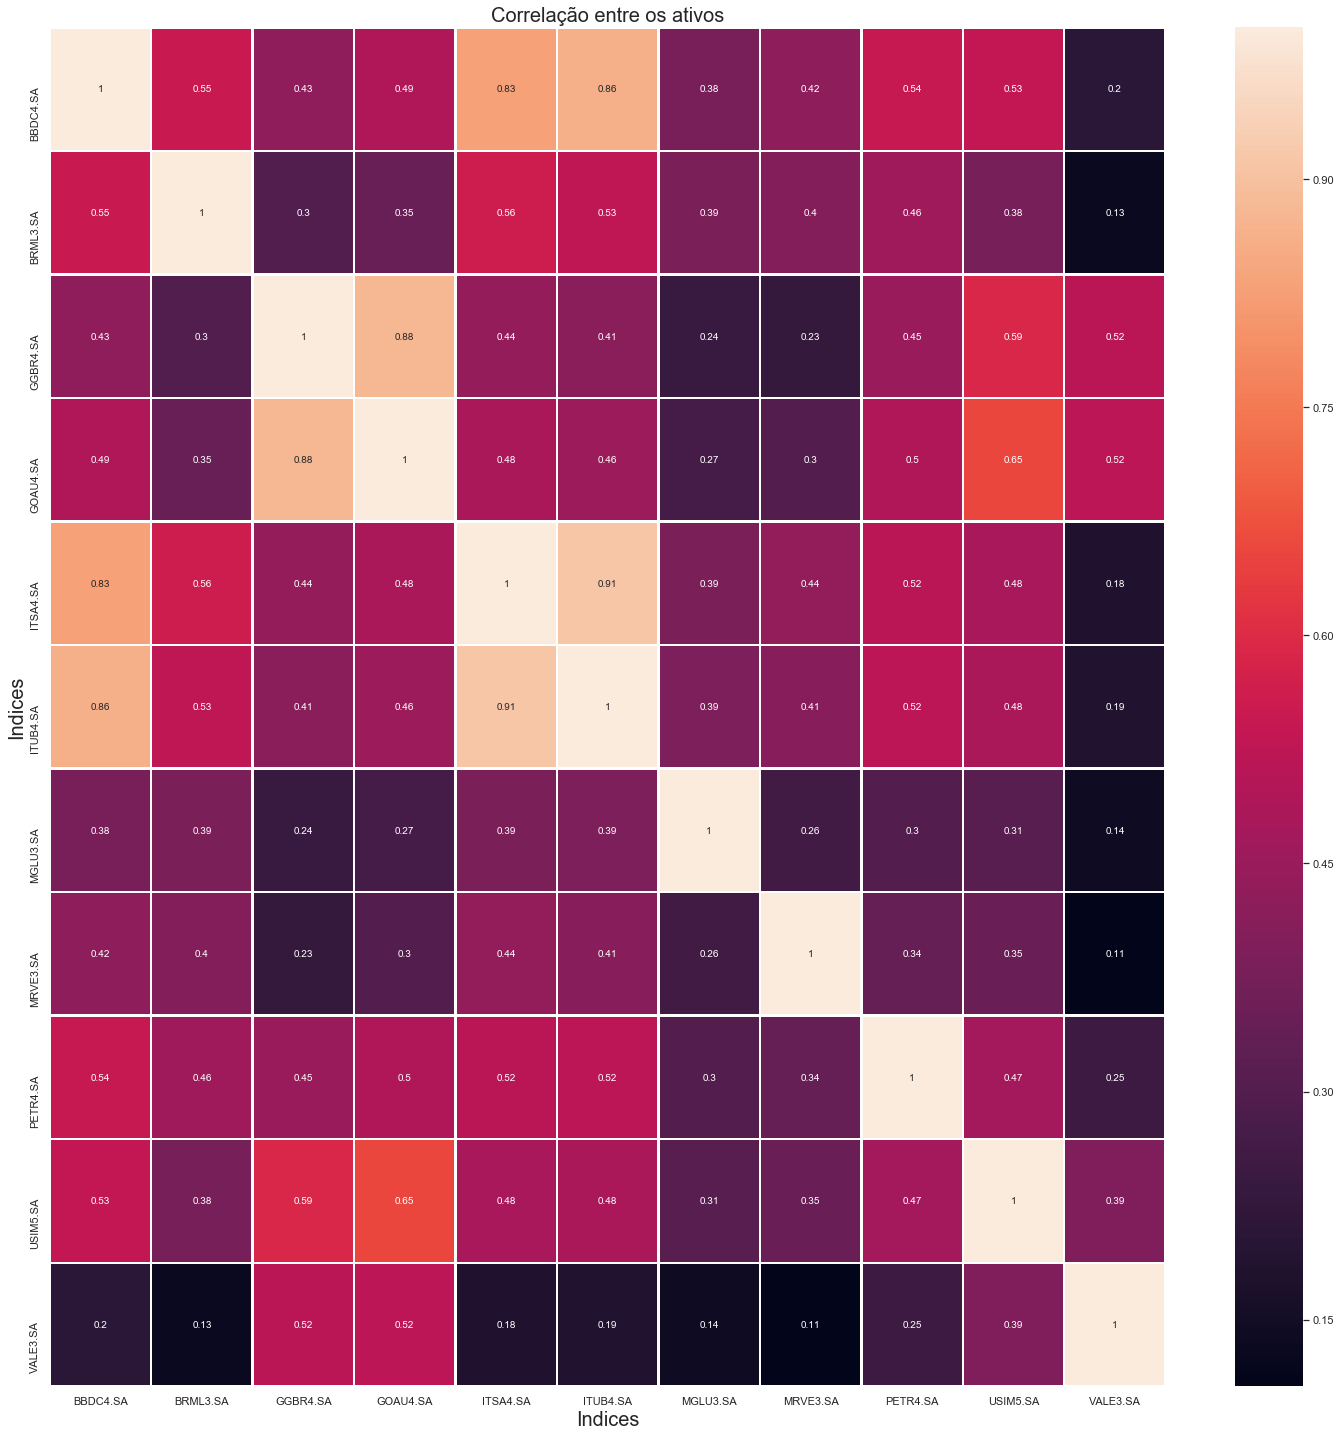

In [8]:
# Analise da correlacao dos ativos com maior volume(todos os indices)

names = []

# Separa as qualidades do data frame por variavel especifica

for i in range(15):
    names.append(market_all['Adj Close'].transpose().iloc[i].name)

market_open = market_all['Open'].transpose()
market_high = market_all['High'].transpose()
market_low = market_all['Low'].transpose()
market_close = market_all['Close'].transpose()

stocks_open = []
stocks_high = []
stocks_low = []
stocks_close = []

for i in range(len(market_open)):
    stocks_open.append(market_open.iloc[i])
    stocks_high.append(market_high.iloc[i])
    stocks_low.append(market_low.iloc[i])
    stocks_close.append(market_close.iloc[i])

stocks_return = []    
stocks_pnames  = []

# Seleciona apenas os ativos com rendimento positivo

for i in range(len(market_open)):
    valor = stocks_close[i].diff().dropna().mean()
    stocks_return.append(valor)
    if valor > 0:
        stocks_pnames.append(names[i])

market_all=yahoo(stocks_pnames,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
market_close=market_all['Adj Close']

# Plota o as correlacoes por mapa de calor

%matplotlib inline 
market_corr=market_close.pct_change().iloc[1:].corr()
fig = plt.subplots(figsize=(25,25))
ax2=plt.subplot(1,1,1)  
sns.heatmap(market_corr, annot=True, linewidths=1.5, ax=ax2)

ax2.set_ylabel("Indices",fontsize=20)  
ax2.set_xlabel("Indices",fontsize=20)  
ax2.set_title("Correlação entre os ativos",fontsize=20)         

In [9]:
corr_list  = market_corr.values.tolist()
menores_corr = []
names = []
for col in market_close.columns:
    names.append(col)

# Ordenacao de um vetor com as medias de correlacao de cada ativo

for i in range(len(corr_list)):
    current_row = corr_list[i]
    media = sum(current_row) / len(current_row)
    menores_corr.append(media)
    
sortd_menores_corr = sorted(menores_corr) 

# Ranking das 5 menores correlacoes com rendimento positivo

best_names = []
for i in range(len(menores_corr)):
    if sortd_menores_corr[0] == menores_corr[i]:
        print('1)',names[i])
        best_names.append(names[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[1] == menores_corr[i]:
        print('2)',names[i])
        best_names.append(names[i])    
for i in range(len(menores_corr)):
    if sortd_menores_corr[2] == menores_corr[i]:
        print('3)',names[i])
        best_names.append(names[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[3] == menores_corr[i]:
        print('4)',names[i])
        best_names.append(names[i])
for i in range(len(menores_corr)):
    if sortd_menores_corr[4] == menores_corr[i]:
        print('5)',names[i])
        best_names.append(names[i])        

1) VALE3.SA
2) MGLU3.SA
3) MRVE3.SA
4) BRML3.SA
5) PETR4.SA


[*********************100%***********************]  5 of 5 downloaded


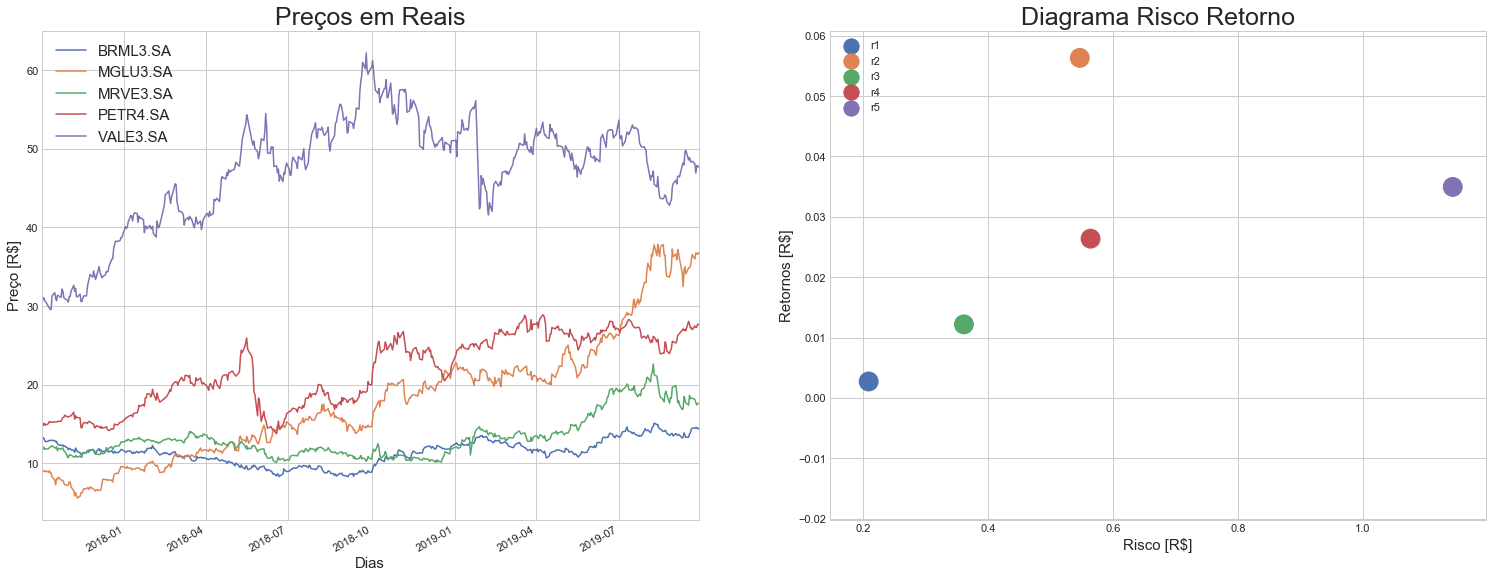

['VALE3.SA', 'MGLU3.SA', 'MRVE3.SA', 'BRML3.SA', 'PETR4.SA']

In [108]:
# Normaliza o periodo de tempo para funcao yahoo finance

today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

market_all=yahoo(best_names,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
market_close=market_all['Adj Close']

# Plota os valores de preco captados pela funcao

fig = plt.subplots(figsize=(40,10))
ax1=plt.subplot(1,3, 1) 
market_close.plot(ax=ax1)
ax1.set_title('Preços em Reais',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax1.set_xlabel('Dias',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax2=plt.subplot(1,3, 2) 
colors = np.random.rand(5)
x = market_close.diff().dropna().std().values
y = market_close.diff().dropna().mean().values
classes = market_close[market_close.columns].mean().values/market_close[market_close.columns].std().values

#Plota o diagrama de risco e retorno dos ativos, selecionan

for i in range(len(x)):
    ax2.scatter(x[i],y[i],  s=50*classes, label='r'+str(1+i))

ax2.legend(loc='upper left')
ax2.set_xlabel("Risco [R$]",fontsize=15)
ax2.set_ylabel('Retornos [R$]',fontsize=15)
ax2.set_title('Diagrama Risco Retorno',fontsize=25) 

plt.show()

best_names

<div id="Tópico 2">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h> Questão 3: Com relação aos 5 (cinco) papéis da questão 2, apresente: (i) os gráficos de preço no formato candlestick, (ii) os gráficos de retorno mês, (iii) o índice Sharpe e o (iv) fator Beta com relação ao índice Bovespa.</h></a></h>   
</div> </div> 

In [18]:
%matplotlib inline 
import matplotlib.dates as mdates
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import pandas_datareader as web
from mpl_finance import candlestick_ohlc
import pickle
sns.set()

def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()      
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo

In [101]:
# Define o peridodo a ser analisado

today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year


# Analise dos 5 ativos filtrados

stocks_all=yahoo(best_names[:5],S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

[*********************100%***********************]  5 of 5 downloaded


In [102]:
stocks_close=stocks_all['Close'].dropna(axis=0, how='all')
stocks_close=stocks_close.dropna(axis=1, how='any')
stocks_open=stocks_all['Open'].dropna(axis=0, how='all')
stocks_open=stocks_open.dropna(axis=1, how='any')
stocks_high=stocks_all['High'].dropna(axis=0, how='all')
stocks_high=stocks_high.dropna(axis=1, how='any')
stocks_low=stocks_all['Low'].dropna(axis=0, how='all')
stocks_low=stocks_low.dropna(axis=1, how='any')

output = None

symbols=list(stocks_close.columns)

for sy in symbols:

    if output is None:
        df = pd.DataFrame(index=stocks_open.index)
        df['open']=stocks_open[sy]
        df['high']=stocks_high[sy]
        df['low']=stocks_low[sy]
        df['close']=stocks_close[sy]

        output = df          

    else:
        df = pd.DataFrame(index=stocks_open.index)
        df['open']=stocks_open[sy]
        df['high']=stocks_high[sy]
        df['low']=stocks_low[sy]
        df['close']=stocks_close[sy]

        
        output=pd.concat([output,df],axis=1) 

#output.reset_index(drop=True, inplace=True)
col1=[]
for sy in symbols:
    forall=[]
    for i in range(4):
        forall.append(sy)
    col1=col1+forall
col2=list(output.columns)

col = pd.MultiIndex.from_arrays([col1,col2])
data = pd.DataFrame(output.values, columns=col)

    
pickle_out = open("data.pickle","wb")
pickle.dump(data, pickle_out)
pickle_out.close() 

pickle_out = open("df.pickle","wb")
pickle.dump(df, pickle_out)
pickle_out.close() 

data[symbols].head()


BRML3.SA                      MGLU3.SA                    MRVE3.SA         \
      open   high    low  close     open   high   low close     open   high   
0    14.02  14.25  13.89  14.09     9.48   9.76  9.30  9.73    12.56  12.58   
1    14.19  14.47  14.06  14.39     9.83  10.05  9.50  9.87    12.50  12.85   
2    14.28  14.45  14.17  14.30     9.81   9.94  9.69  9.94    12.84  12.96   
3    14.52  14.67  13.89  13.94     9.94  10.00  9.65  9.80    13.00  13.17   
4    13.92  13.95  13.62  13.80     9.75  10.00  9.58  9.96    12.71  12.74   

                PETR4.SA                      VALE3.SA                       
     low  close     open   high    low  close     open   high    low  close  
0  12.33  12.45    15.19  15.40  15.06  15.40    32.25  32.43  31.87  31.90  
1  12.48  12.77    15.60  15.98  15.52  15.98    32.09  32.68  31.76  32.68  
2  12.66  12.96    15.90  15.94  15.65  15.66    32.88  33.07  32.61  32.61  
3  12.65  12.67    15.88  16.11  15.85  15.90    33.00  33.19  32.24  32.27  
4  12.44  12.71    15.66  15.77  15.54  15.69    32.07  32.15  31.83  32.14

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


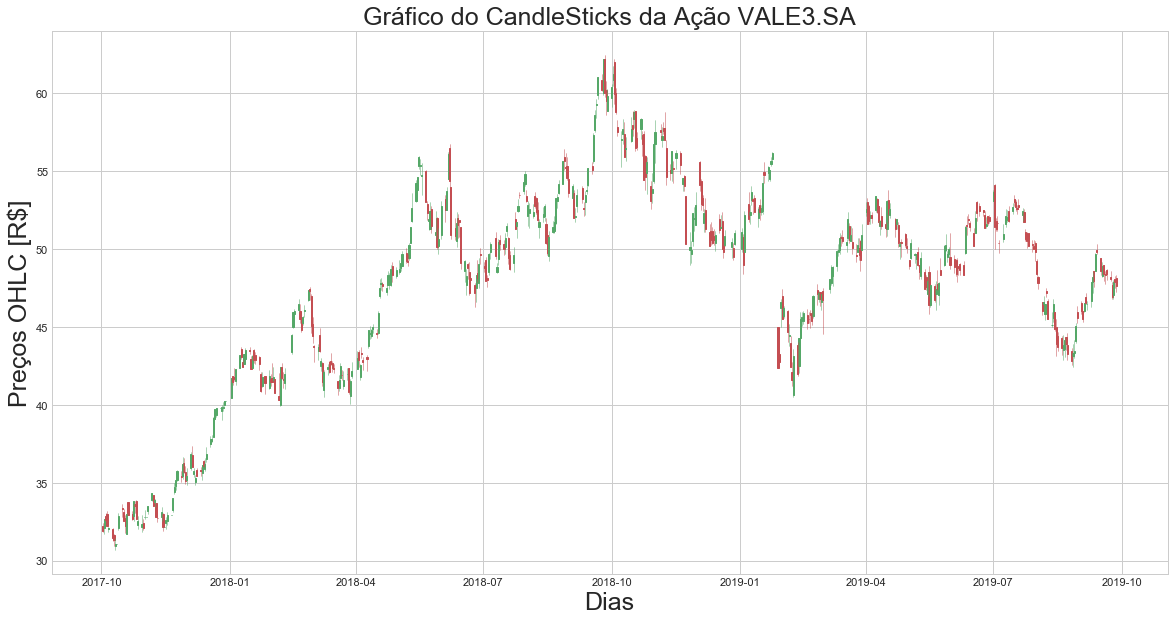

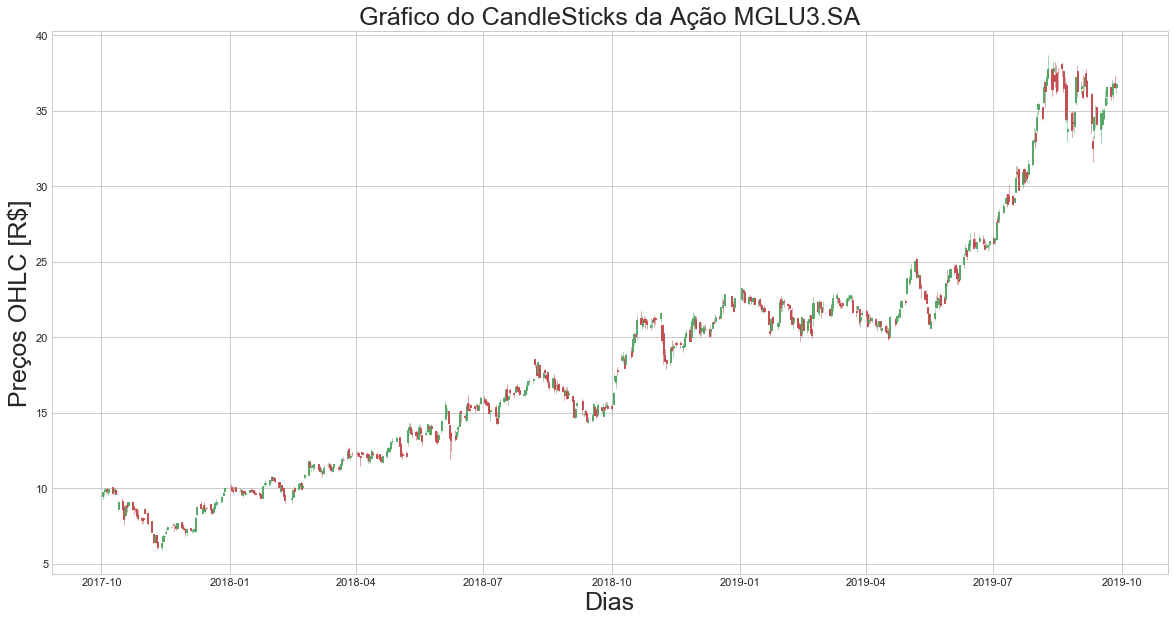

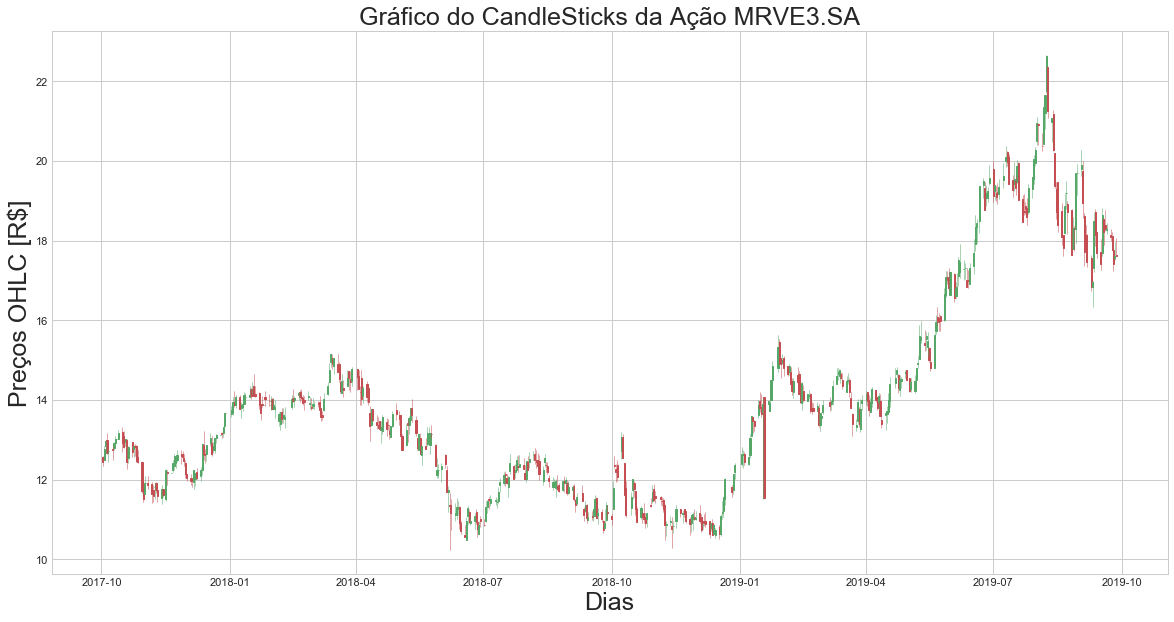

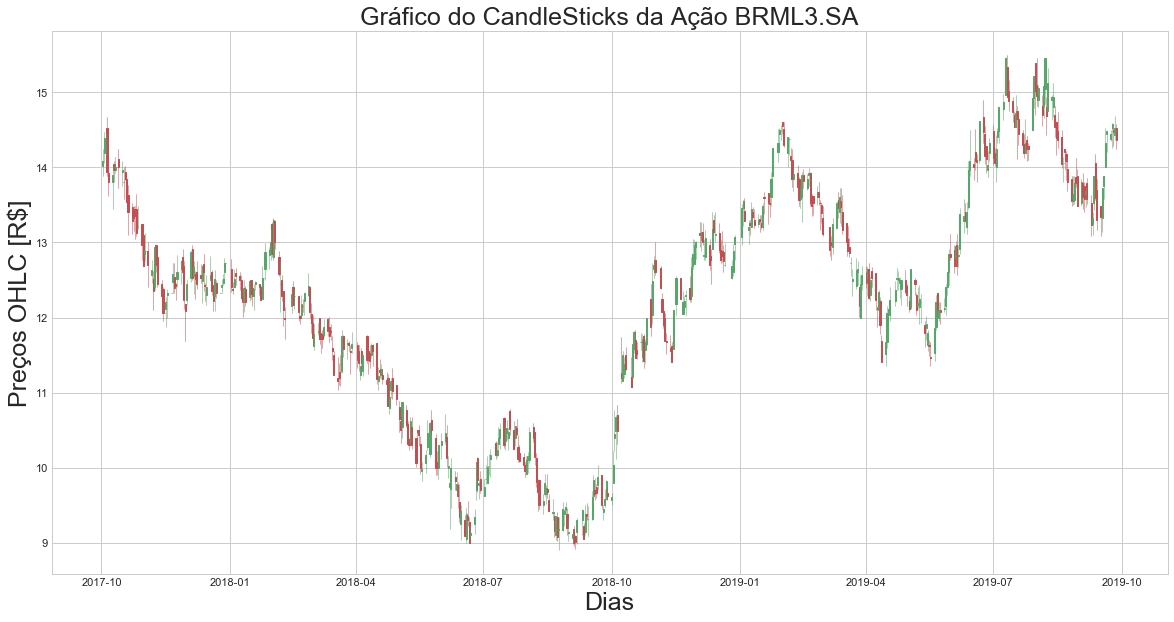

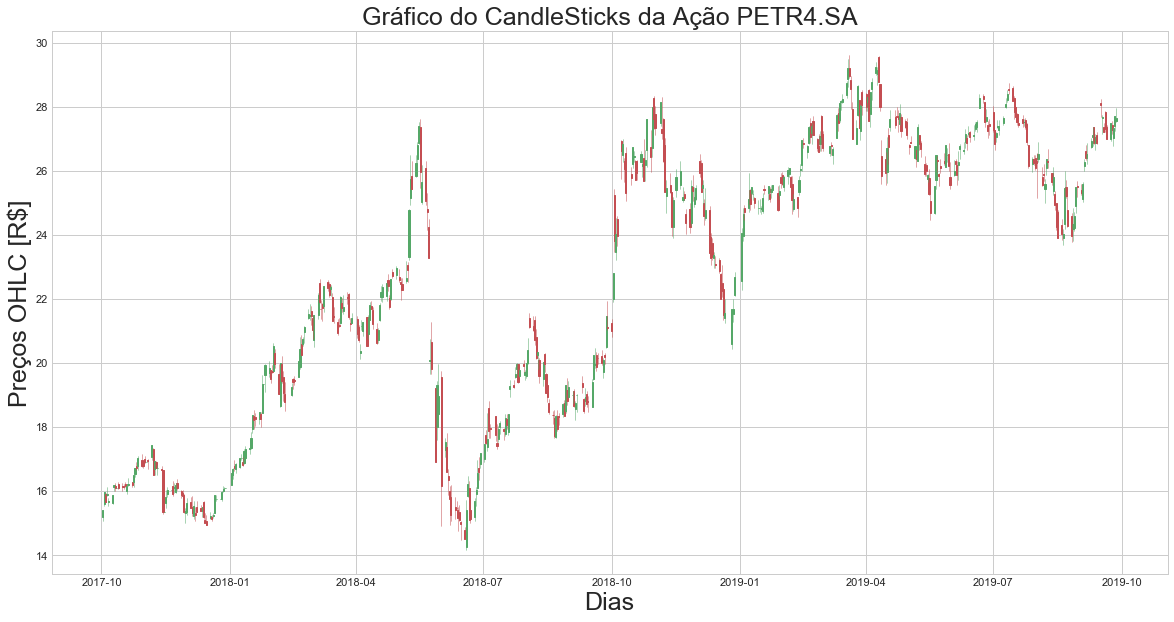

In [21]:
pickle_in = open("data.pickle","rb")
data = pickle.load(pickle_in)

pickle_in = open("df.pickle","rb")
df = pickle.load(pickle_in)

for i in range(len(best_names)):
    df1 = pd.DataFrame(index=df.index)
    df1['open']=data[best_names[i]].open.values
    df1['high']=data[best_names[i]].high.values
    df1['low']=data[best_names[i]].low.values
    df1['close']=data[best_names[i]].close.values

    df1.reset_index(inplace=True)
    df1['Date'] = df1['Date'].map(mdates.date2num)

    fig = plt.subplots(figsize=(20,10))

    plt.style.use('seaborn-whitegrid')

    ax1 = plt.subplot(111)
    candlestick_ohlc(ax1, df1.values, width=0.8, colorup='g', colordown='r',alpha=1)
    ax1.legend(loc='upper left')
    ax1.set_xlabel("Dias",fontsize=25)
    ax1.set_ylabel('Preços OHLC [R$]',fontsize=25)
    ax1.set_title('Gráfico do CandleSticks da Ação '+best_names[i],fontsize=25) 
    ax1.xaxis_date()
    
    df1 = None

In [22]:
# Define o peridodo a ser analisado

today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year


# Analise dos 5 ativos filtrados

stocks_all=yahoo(best_names[:5],S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)


[*********************100%***********************]  5 of 5 downloaded


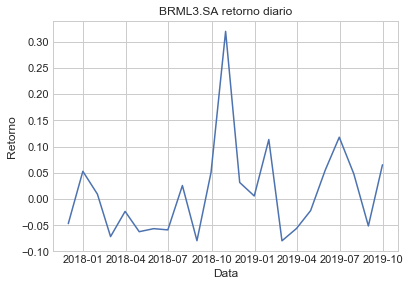

In [59]:
# Calculando retornos diarios e mensais dos ativos

stocks_all['Adj Close']['BRML3.SA']
ativ_daily_returns = stocks_all['Adj Close']['BRML3.SA'].pct_change()
ativ_monthly_returns = stocks_all['Adj Close']['BRML3.SA'].resample('M').ffill().diff().dropna()

# Plotando as variaveis

fig = plt.figure(figsize = (15,7.5))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(ativ_monthly_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retorno")
ax1.set_title("BRML3.SA retorno mensal")
plt.show()

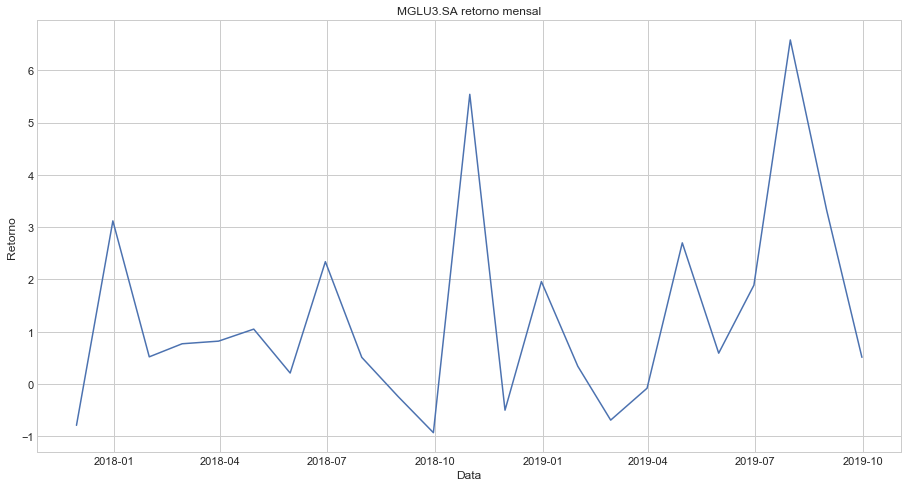

In [309]:
# Calculando retornos diarios e mensais dos ativos

stocks_all['Adj Close']['MGLU3.SA']
ativ_daily_returns = stocks_all['Adj Close']['MGLU3.SA'].pct_change()
ativ_monthly_returns = stocks_all['Adj Close']['MGLU3.SA'].resample('M').ffill().diff().dropna()

# Plotando as variaveis

fig = plt.figure(figsize = (15,7.5))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(ativ_monthly_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retorno")
ax1.set_title("MGLU3.SA retorno mensal")
plt.show()

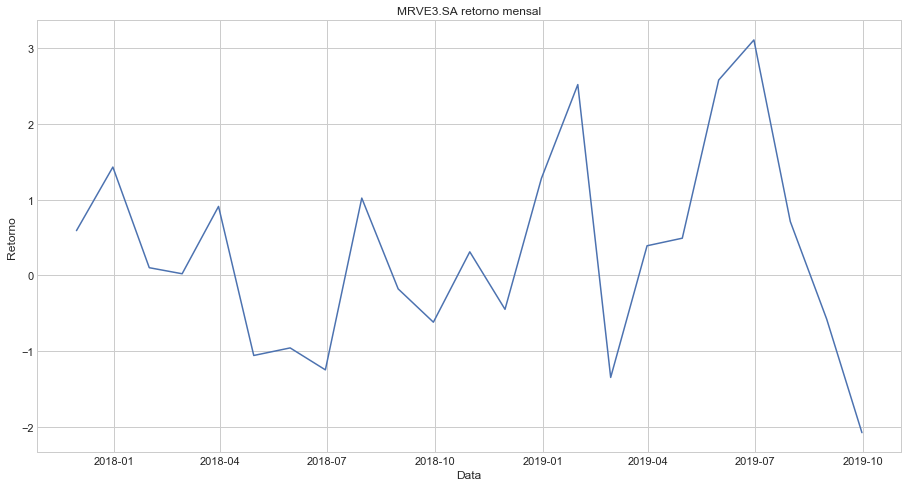

In [310]:
# Calculando retornos diarios e mensais dos ativos

stocks_all['Adj Close']['MRVE3.SA']
ativ_daily_returns = stocks_all['Adj Close']['MRVE3.SA'].pct_change()
ativ_monthly_returns = stocks_all['Adj Close']['MRVE3.SA'].resample('M').ffill().diff().dropna()

# Plotando as variaveis

fig = plt.figure(figsize = (15,7.5))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(ativ_monthly_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retorno")
ax1.set_title("MRVE3.SA retorno mensal")
plt.show()

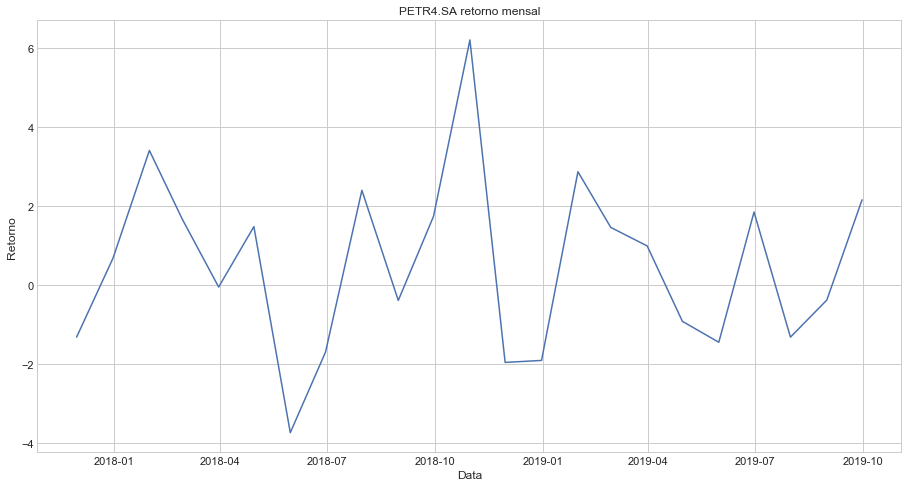

In [311]:
# Calculando retornos diarios e mensais dos ativos

stocks_all['Adj Close']['PETR4.SA']
ativ_daily_returns = stocks_all['Adj Close']['PETR4.SA'].pct_change()
ativ_monthly_returns = stocks_all['Adj Close']['PETR4.SA'].resample('M').ffill().diff().dropna()

# Plotando as variaveis

fig = plt.figure(figsize = (15,7.5))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(ativ_monthly_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retorno")
ax1.set_title("PETR4.SA retorno mensal")
plt.show()

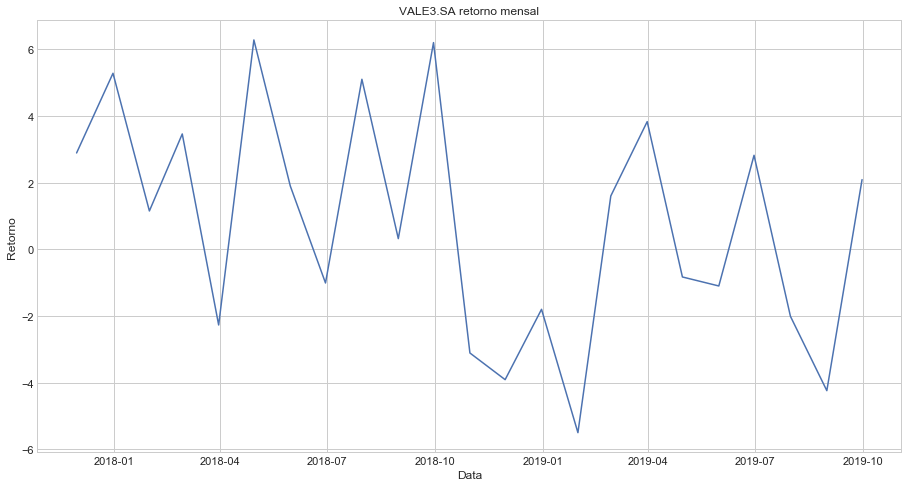

In [312]:
# Calculando retornos diarios e mensais dos ativos

stocks_all['Adj Close']['VALE3.SA']
ativ_daily_returns = stocks_all['Adj Close']['VALE3.SA'].pct_change()
ativ_monthly_returns = stocks_all['Adj Close']['VALE3.SA'].resample('M').ffill().diff().dropna()

# Plotando as variaveis

fig = plt.figure(figsize = (15,7.5))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(ativ_monthly_returns)
ax1.set_xlabel("Data")
ax1.set_ylabel("Retorno")
ax1.set_title("VALE3.SA retorno mensal")
plt.show()

In [290]:
# Calculo do indice Sharpe e Beta


# Sharpe = (Ret do Ativo - Ret livre de risco) / (Volatilidade do ativo)
# Implementacao da funcao
def sharpe(ret_ativ, ret_free_risk, ativ_volatility):
    s = (ret_ativ - ret_free_risk)/ativ_volatility
    return s

ret_free_risk = 0.065 #Considerando a Taxa Selic de 2018

# Beta = Cov(Ret do Ativo, Ret do Mercado) / Var(Ret do Mercado)
# Implementacao da funcao
def beta(ret_ativ, ret_market):
    b = (ret_ativ.cov(ret_market))/ ret_market.var()
    return b

# Define o peridodo a ser analisado
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

# Coletando serie historica e calculando variaveis
# Ibovespa
ibov = yahoo('^BVSP',S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
ibov_year_returns = ibov['Adj Close'].resample('Y').ffill().diff().dropna()
ibov_mean = ibov['Adj Close'].resample('Y').mean()
ibov_std = ibov['Adj Close'].resample('Y').std()
ibov_year_volatility = (ibov_mean/ibov_std)


# PETR4.SA
ativ_year_returns = stocks_all['Adj Close']['PETR4.SA'].resample('Y').ffill().diff().dropna()
ativ_mean = stocks_all['Adj Close']['PETR4.SA'].resample('Y').mean()
ativ_std = stocks_all['Adj Close']['PETR4.SA'].resample('Y').std()
ativ_year_volatility = ativ_year_returns.std()

# Calculando
sharpe = sharpe(ativ_year_returns, ret_free_risk, ativ_year_volatility)
beta = beta(ativ_year_returns, ibov_year_returns)

print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print('                                    PETR4.SA(2018)                                          ')
print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print("Sharpe: ",sharpe[1])
print("Beta: ", beta," \n")



[*********************100%***********************]  1 of 1 downloaded
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
                                    PETR4.SA(2018)                                          
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Sharpe:  3.866757608699075
Beta:  -0.00035361995160990075  



In [352]:
# Calculo do indice Sharpe e Beta


# Sharpe = (Ret do Ativo - Ret livre de risco) / (Volatilidade do ativo)
# Implementacao da funcao
def sharpe(ret_ativ, ret_free_risk, ativ_volatility):
    s = (ret_ativ - ret_free_risk)/ativ_volatility
    return s

ret_free_risk = 0.065 #Considerando a Taxa Selic de 2018

# Beta = Cov(Ret do Ativo, Ret do Mercado) / Var(Ret do Mercado)
# Implementacao da funcao
def beta(ret_ativ, ret_market):
    b = (ret_ativ.cov(ret_market))/ ret_market.var()
    return b

# Define o peridodo a ser analisado
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

# Coletando serie historica e calculando variaveis
# Ibovespa
ibov = yahoo('^BVSP',S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
ibov_year_returns = ibov['Adj Close'].resample('Y').ffill().diff().dropna()
ibov_mean = ibov['Adj Close'].resample('Y').mean()
ibov_std = ibov['Adj Close'].resample('Y').std()
ibov_year_volatility = (ibov_mean/ibov_std)


# VALE3.SA
ativ_year_returns = stocks_all['Adj Close']['VALE3.SA'].resample('Y').ffill().diff().dropna()
ativ_mean = stocks_all['Adj Close']['VALE3.SA'].resample('Y').mean()
ativ_std = stocks_all['Adj Close']['VALE3.SA'].resample('Y').std()
ativ_year_volatility = ativ_year_returns.std()

# Calculando
sharpe2 = sharpe(ativ_year_returns, ret_free_risk, ativ_year_volatility)
beta2 = beta(ativ_year_returns, ibov_year_returns)

print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print('                                    VALE3.SA(2018)                                          ')
print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print("Sharpe: ",sharpe2[1])
print("Beta: ", beta2," \n")
#print(ibov_year_returns, ativ_year_returns)
ibov_year_returns = ibov['Adj Close']
print(ibov_year_returns.pct_change().cumsum())



[*********************100%***********************]  1 of 1 downloaded
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
                                    VALE3.SA(2018)                                          
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Sharpe:  -0.30769311053548826
Beta:  -0.0029127117066815567  

Date
2017-10-02         NaN
2017-10-03    0.032316
2017-10-04    0.030075
2017-10-05    0.030428
2017-10-06    0.023079
2017-10-09    0.018767
2017-10-10    0.034217
2017-10-11    0.031135
2017-10-13    0.035440
2017-10-16    0.034167
2017-10-17    0.025180
2017-10-18    0.030298
2017-10-19    0.026277
2017-10-20    0.027693
2017-10-23    0.014890
2017-10-24    0.027315
2017-10-25    0.031519
2017-1

In [300]:
# Calculo do indice Sharpe e Beta


# Sharpe = (Ret do Ativo - Ret livre de risco) / (Volatilidade do ativo)
# Implementacao da funcao
def sharpe(ret_ativ, ret_free_risk, ativ_volatility):
    s = (ret_ativ - ret_free_risk)/ativ_volatility
    return s

ret_free_risk = 0.065 #Considerando a Taxa Selic de 2018

# Beta = Cov(Ret do Ativo, Ret do Mercado) / Var(Ret do Mercado)
# Implementacao da funcao
def beta(ret_ativ, ret_market):
    b = (ret_ativ.cov(ret_market))/ ret_market.var()
    return b

# Define o peridodo a ser analisado
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

# Coletando serie historica e calculando variaveis
# Ibovespa
ibov = yahoo('^BVSP',S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
ibov_year_returns = ibov['Adj Close'].resample('Y').ffill().diff().dropna()
ibov_mean = ibov['Adj Close'].resample('Y').mean()
ibov_std = ibov['Adj Close'].resample('Y').std()
ibov_year_volatility = (ibov_mean/ibov_std)


# MRVE3.SA
ativ_year_returns = stocks_all['Adj Close']['MRVE3.SA'].resample('Y').ffill().diff().dropna()
ativ_mean = stocks_all['Adj Close']['MRVE3.SA'].resample('Y').mean()
ativ_std = stocks_all['Adj Close']['MRVE3.SA'].resample('Y').std()
ativ_year_volatility = ativ_year_returns.std()

# Calculando
sharpe3 = sharpe(ativ_year_returns, ret_free_risk, ativ_year_volatility)
beta3 = beta(ativ_year_returns, ibov_year_returns)

print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print('                                    MRVE3.SA(2018)                                          ')
print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print("Sharpe: ",sharpe3[1])
print("Beta: ", beta3," \n")



[*********************100%***********************]  1 of 1 downloaded
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
                                    MRVE3.SA(2018)                                          
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Sharpe:  1.2138489722017944
Beta:  0.0012413921459147595  



In [299]:
# Calculo do indice Sharpe e Beta


# Sharpe = (Ret do Ativo - Ret livre de risco) / (Volatilidade do ativo)
# Implementacao da funcao
def sharpe(ret_ativ, ret_free_risk, ativ_volatility):
    s = (ret_ativ - ret_free_risk)/ativ_volatility
    return s

ret_free_risk = 0.065 #Considerando a Taxa Selic de 2018

# Beta = Cov(Ret do Ativo, Ret do Mercado) / Var(Ret do Mercado)
# Implementacao da funcao
def beta(ret_ativ, ret_market):
    b = (ret_ativ.cov(ret_market))/ ret_market.var()
    return b

# Define o peridodo a ser analisado
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

# Coletando serie historica e calculando variaveis
# Ibovespa
ibov = yahoo('^BVSP',S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
ibov_year_returns = ibov['Adj Close'].resample('Y').ffill().diff().dropna()
ibov_mean = ibov['Adj Close'].resample('Y').mean()
ibov_std = ibov['Adj Close'].resample('Y').std()
ibov_year_volatility = (ibov_mean/ibov_std)


# MGLU3.SA
ativ_year_returns = stocks_all['Adj Close']['MGLU3.SA'].resample('Y').ffill().diff().dropna()
ativ_mean = stocks_all['Adj Close']['MGLU3.SA'].resample('Y').mean()
ativ_std = stocks_all['Adj Close']['MGLU3.SA'].resample('Y').std()
ativ_year_volatility = ativ_year_returns.std()


# Calculando
sharpe4 = sharpe(ativ_year_returns, ret_free_risk, ativ_year_volatility)
beta4 = beta(ativ_year_returns, ibov_year_returns)

print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print('                                    MGLU3.SA(2018)                                          ')
print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print("Sharpe: ",sharpe4[1])
print("Beta: ", beta4," \n")



[*********************100%***********************]  1 of 1 downloaded
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
                                    MGLU3.SA(2018)                                          
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Sharpe:  6.864165184572957
Beta:  0.0005788200260562062  



In [298]:
# Calculo do indice Sharpe e Beta


# Sharpe = (Ret do Ativo - Ret livre de risco) / (Volatilidade do ativo)
# Implementacao da funcao
def sharpe(ret_ativ, ret_free_risk, ativ_volatility):
    s = (ret_ativ - ret_free_risk)/ativ_volatility
    return s

ret_free_risk = 0.065 #Considerando a Taxa Selic de 2018

# Beta = Cov(Ret do Ativo, Ret do Mercado) / Var(Ret do Mercado)
# Implementacao da funcao
def beta(ret_ativ, ret_market):
    b = (ret_ativ.cov(ret_market))/ ret_market.var()
    return b

# Define o peridodo a ser analisado
today = dt.date.today()
E_Day = today.day; E_Month = today.month; E_Year = today.year
day_before = today - dt.timedelta(730)
S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

# Coletando serie historica e calculando variaveis
# Ibovespa
ibov = yahoo('^BVSP',S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
ibov_year_returns = ibov['Adj Close'].resample('Y').ffill().diff().dropna()
ibov_mean = ibov['Adj Close'].resample('Y').mean()
ibov_std = ibov['Adj Close'].resample('Y').std()
ibov_year_volatility = (ibov_mean/ibov_std)


# MGLU3.SA
ativ_year_returns = stocks_all['Adj Close']['BRML3.SA'].resample('Y').ffill().diff().dropna()
ativ_mean = stocks_all['Adj Close']['BRML3.SA'].resample('Y').mean()
ativ_std = stocks_all['Adj Close']['BRML3.SA'].resample('Y').std()
ativ_year_volatility = ativ_year_returns.std()

# Calculando
sharpe5 = sharpe(ativ_year_returns, ret_free_risk, ativ_year_volatility)
beta5 = beta(ativ_year_returns, ibov_year_returns)

print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print('                                    BRML3.SA(2018)                                          ')
print('--------------------------------------------------------------------------------------------')
print('--------------------------------------------------------------------------------------------')
print("Sharpe: ",sharpe5[1])
print("Beta: ", beta5," \n\n")



[*********************100%***********************]  1 of 1 downloaded
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
                                    BRML3.SA(2018)                                          
--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
Sharpe:  1.6867854500930493
Beta:  0.00033314721756932795  





Preços [R$]:
            BRML3.SA  MGLU3.SA  MRVE3.SA  PETR4.SA  VALE3.SA
Date                                                        
2017-12-31     11.75      9.59     12.71     15.24     38.69
2018-12-31     12.16     21.64     11.83     22.40     51.00
2019-12-31     14.36     36.80     17.62     27.66     47.66

Retornos [R$]:
            BRML3.SA  MGLU3.SA  MRVE3.SA  PETR4.SA  VALE3.SA
Date                                                        
2018-12-31      0.41     12.05     -0.88      7.16     12.31
2019-12-31      2.20     15.16      5.79      5.26     -3.34

Matriz de Volatilidade [R$]:
          BRML3.SA  MGLU3.SA  MRVE3.SA  PETR4.SA   VALE3.SA
BRML3.SA  1.265721  0.000000  0.000000 -0.000000  -0.000000
MGLU3.SA  0.000000  2.199102  0.000000 -0.000000  -0.000000
MRVE3.SA  0.000000  0.000000  4.716402 -0.000000  -0.000000
PETR4.SA -0.000000 -0.000000 -0.000000  1.343503   0.000000
VALE3.SA -0.000000 -0.000000 -0.000000  0.000000  11.066221



Text(0.5, 1.0, 'Correlações entre ativos ')

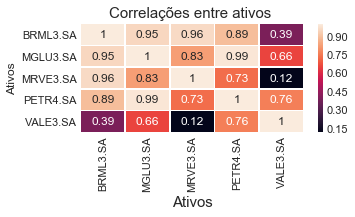

In [296]:
df = stocks_all['Adj Close'].resample('Y').ffill()
ret=df.diff().dropna()

C=ret.cov()

sig=ret.std()

MU=ret.sum()

I=pd.DataFrame(np.identity(len(C)))

SIGMA=(C*(I.values))**0.5

P=df.corr()
print()
print("Preços [R$]:")
print(df.head())
print('')
print("Retornos [R$]:")
print(ret.head(4))
print('')
print("Matriz de Volatilidade [R$]:")
print(SIGMA)
print()
f, ax = plt.subplots(figsize=(5, 2))
sns.heatmap(P, annot=True, linewidths=.5, ax=ax)
plt.yticks(rotation=0) 
ax.set_ylabel("Ativos",fontsize=12)  
ax.set_xlabel("Ativos",fontsize=15)  
ax.set_title("Correlações entre ativos ",fontsize=15) 

<div id="Tópico 3">
    <div class="alert alert-block alert-info" style="margin-top: 0px">
        <h><a href="#Tópicos"><h>1) Questão 4: Considerando os 5 (cinco) papeis escolhidos, na questão 2, aplique a Teoria do Portfólio Moderno de Markowitz. Nesse sentido, (i) Identifique o diagrama Risco x Retorno, (ii) a curva de eficiência, (iii) o portfólio de menor risco e o (iv) portfólio com maior índice Sharpe.</h></a></h>   
</div> </div> 